In [1]:
import pandas as pd
from plotnine import *

In [2]:
# results_df = pd.read_csv('structures_experiment_results_1.csv')
results_df = pd.read_csv('./experiment_results/long_chain_results_sin1.csv')

In [3]:
results_df['cat_retries'] = pd.Categorical(results_df['retries']).rename_categories({100: 'Fail'})
# results_df['fraction'] = results_df['reqs'] / (365*24*60*60)
results_df['fraction'] = results_df['reqs'] / (365*24*60*60/2) # For sin stuff
min_max_per_exp = results_df.groupby(['vendor', 'experiment', 'cat_retries'])['fraction'].agg(['min', 'max', 'mean']).reset_index().fillna(0)

In [4]:
results_df

,Unnamed: 0,vendor,reqs,retries,iteration,experiment,cat_retries,fraction
0,0,uniform,1.499495e+07,0,0,deep chain,0,9.509732e-01
1,1,uniform,7.501410e+05,1,0,deep chain,1,4.757363e-02
2,2,uniform,2.239900e+04,2,0,deep chain,2,1.420535e-03
3,3,uniform,4.870000e+02,3,0,deep chain,3,3.088534e-05
4,4,uniform,1.100000e+01,4,0,deep chain,4,6.976154e-07
5,5,uniform,1.000000e+00,5,0,deep chain,5,6.341958e-08
6,6,uniform,1.608636e+01,100,0,deep chain,Fail,1.020190e-06
7,0,instagram,1.565882e+07,0,0,deep chain,0,9.930757e-01
8,1,instagram,1.052420e+05,1,0,deep chain,1,6.674404e-03
9,2,instagram,1.953000e+03,2,0,deep chain,2,1.238584e-04


/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: deep chain comparison.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: deep chain comparison.pdf
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log

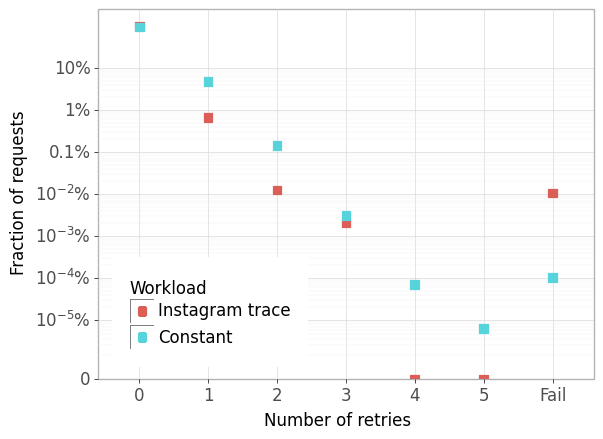

<ggplot: (8745862510571)>

In [5]:
experiment = 'deep chain'
specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
plt = ggplot(specific_min_max) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12), legend_position=(0.3, 0.25)) +\
    geom_point(aes(x='cat_retries', y='mean', color='vendor', group='vendor'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-8], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.4e-8],
                  labels=['10%', '1%', '0.1%', '$10^{-2}$%', '$10^{-3}$%', '$10^{-4}$%', '$10^{-5}$%', '0']) +\
    guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
    scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
    xlab('Number of retries')+\
    ylab('Fraction of requests')

plt.save(f'{experiment} comparison.png', dpi=300)
plt.save(f'{experiment} comparison.pdf')
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: monolith comparison.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


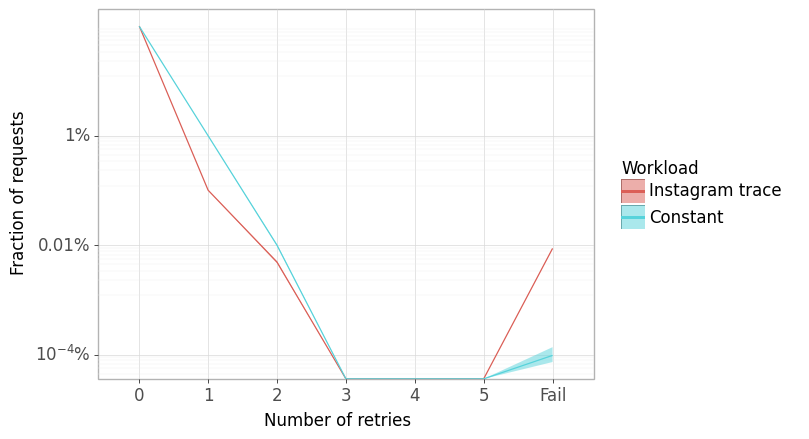

<ggplot: (8754258244961)>

In [25]:
experiment = 'monolith'
specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
plt = ggplot(specific_min_max) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_line(aes(x='cat_retries', y='mean', color='vendor', group='vendor')) +\
    geom_ribbon(aes(x='cat_retries', ymin='min', ymax='max', fill='vendor', group='vendor'), alpha=0.5) +\
    scale_y_log10(breaks = [0.01, 0.0001, 0.000001, 1e-8], labels=['1%', '0.01%', '$10^{-4}$%', '$10^{-6}$%']) +\
    guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
    scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
    scale_fill_discrete(labels=['Instagram trace', 'Constant']) +\
    xlab('Number of retries')+\
    ylab('Fraction of requests')

plt.save(f'{experiment} comparison.png', dpi=300)
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: fanout comparison.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


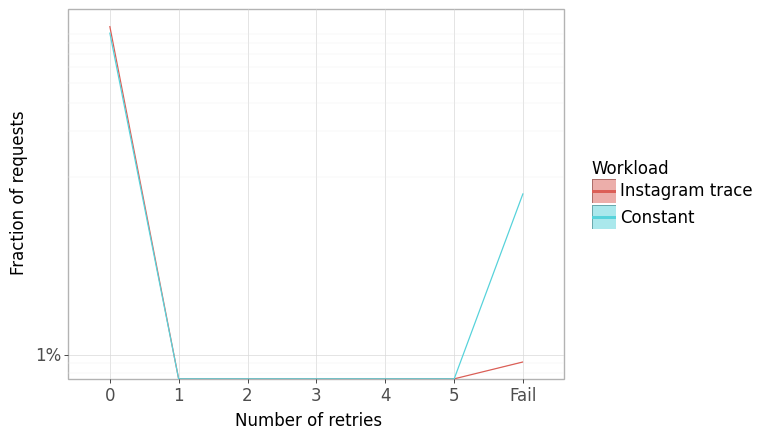

<ggplot: (8754259025177)>

In [26]:
experiment = 'fanout'
specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
plt = ggplot(specific_min_max) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_line(aes(x='cat_retries', y='mean', color='vendor', group='vendor')) +\
    geom_ribbon(aes(x='cat_retries', ymin='min', ymax='max', fill='vendor', group='vendor'), alpha=0.5) +\
    scale_y_log10(breaks = [0.01, 0.0001, 0.000001], labels=['1%', '0.01%', '0.0001%']) +\
    guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
    scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
    scale_fill_discrete(labels=['Instagram trace', 'Constant']) +\
    xlab('Number of retries')+\
    ylab('Fraction of requests')

plt.save(f'{experiment} comparison.png', dpi=300)
plt

In [27]:
const_results_df = pd.read_csv('const_experiment_results_1.csv')
const_results_df['cat_retries'] = pd.Categorical(const_results_df['retries']).rename_categories({100: 'Fail'})
const_results_df['cat_prob'] = pd.Categorical(const_results_df['prob']).rename_categories({100: 'Fail'})
const_results_df['fraction'] = const_results_df['reqs'] / (365*24*60*60)
const_results_df.columns

Index(['Unnamed: 0', 'vendor', 'prob', 'reqs', 'retries', 'iteration',
       'experiment', 'cat_retries', 'cat_prob', 'fraction'],
      dtype='object')

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: const comparison.png


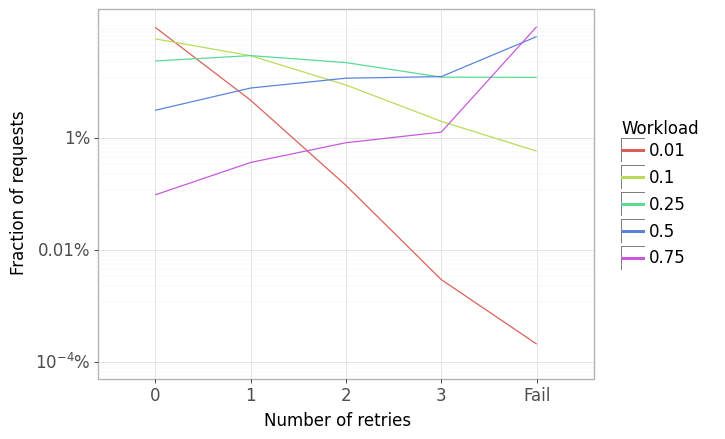

<ggplot: (8754259048608)>

In [32]:
experiment = 'deep chain'
specific_const_results = const_results_df[(const_results_df['experiment'] == experiment)]
plt = ggplot(specific_const_results) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_line(aes(x='cat_retries', y='fraction', color='cat_prob', group='cat_prob')) +\
    scale_y_log10(limits=[1, 1e-6], breaks = [0.01, 0.0001, 0.000001, 1e-8], labels=['1%', '0.01%', '$10^{-4}$%', '$10^{-6}$%']) +\
    guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
    xlab('Number of retries')+\
    ylab('Fraction of requests')

plt.save(f'const comparison.png', dpi=300)
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: low const.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: low const.pdf


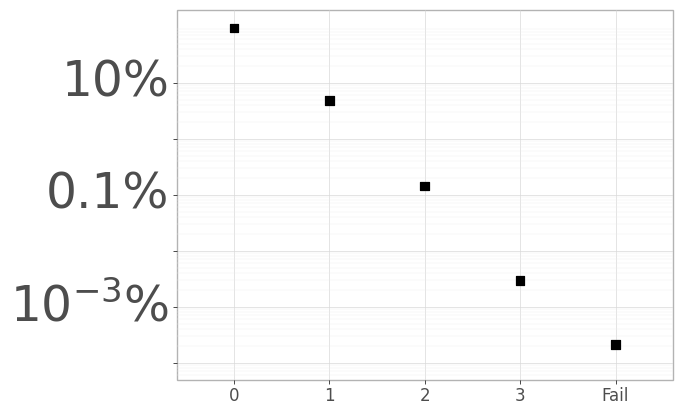

<ggplot: (8754257873363)>

In [135]:
experiment = 'deep chain'
specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.01)]
plt = ggplot(specific_const_results) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12), axis_text_y=element_text(size=35)) +\
    geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                  labels=['10%', '', '0.1%', '', '$10^{-3}$%', '']) +\
    xlab('')+\
    ylab('')

plt.save(f'low const.png', dpi=300)
plt.save(f'low const.pdf')
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 25 const.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 25 const.pdf


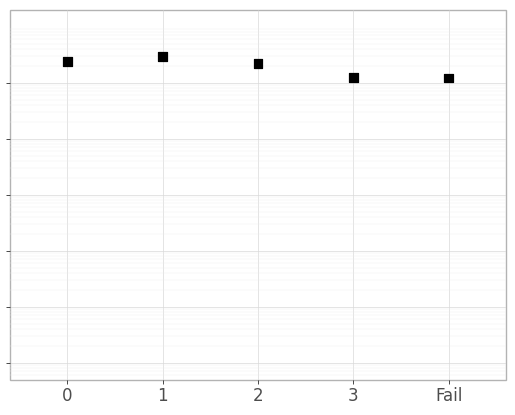

<ggplot: (8754257991985)>

In [131]:
experiment = 'deep chain'
specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.25)]
plt = ggplot(specific_const_results) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                  labels=['', '', '', '', '', '']) +\
    xlab('')+\
    ylab('')

plt.save(f'25 const.png', dpi=300)
plt.save(f'25 const.pdf')
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 50 const.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 50 const.pdf


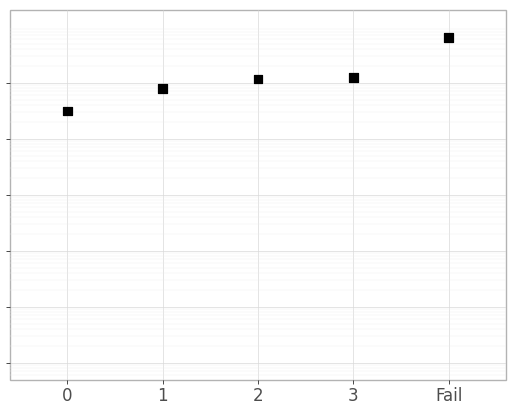

<ggplot: (8754255997681)>

In [132]:
experiment = 'deep chain'
specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.5)]
plt = ggplot(specific_const_results) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                  labels=['', '', '', '', '', '']) +\
    xlab('')+\
    ylab('')

plt.save(f'50 const.png', dpi=300)
plt.save(f'50 const.pdf')
plt

/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: 75 const.png


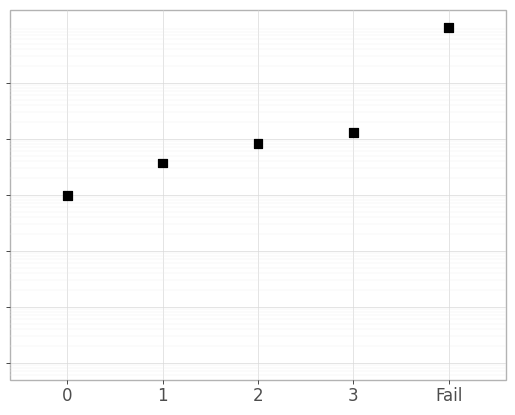

<ggplot: (8754257941628)>

In [133]:
experiment = 'deep chain'
specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.75)]
plt = ggplot(specific_const_results) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12)) +\
    geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                  labels=['', '', '', '', '', '']) +\
    xlab('')+\
    ylab('')

plt.save(f'75 const.png', dpi=300)
plt

In [58]:
print(pd.pivot_table(min_max_per_exp[['vendor', 'experiment', 'cat_retries', 'mean']], values='mean', index=['vendor', 'experiment'], columns=['cat_retries']).to_latex(float_format="{:0.2e}".format))

\begin{tabular}{llrrrrrrr}
\toprule
        & cat\_retries &        0 &        1 &        2 &        3 &        4 &        5 &     Fail \\
vendor & experiment &          &          &          &          &          &          &          \\
\midrule
instagram & deep chain & 9.95e-01 & 4.34e-03 & 2.92e-04 & 9.35e-05 & 0.00e+00 & 0.00e+00 & 1.79e-04 \\
        & fanout & 9.91e-01 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 9.07e-03 \\
        & monolith & 9.99e-01 & 1.00e-03 & 4.87e-05 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 8.67e-05 \\
uniform & deep chain & 9.51e-01 & 4.76e-02 & 1.43e-03 & 3.26e-05 & 6.41e-07 & 4.23e-08 & 1.08e-06 \\
        & fanout & 9.04e-01 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 9.56e-02 \\
        & monolith & 9.90e-01 & 9.90e-03 & 9.89e-05 & 0.00e+00 & 0.00e+00 & 0.00e+00 & 9.64e-07 \\
\bottomrule
\end{tabular}

